# Energieeffizienz von Haushaltsgeräten

- [ ] TODO Zitierweise, Danksagung Förderung einfügen

## python konfigurieren

### Module importieren

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import datetime as dt
import seaborn as sns
import plotly
import plotly.graph_objects as go
import sys
import os
import os.path
import platform
from PIL import Image
import requests
import scipy
from scipy.optimize import curve_fit

print('Versionen der verwendeten python-Module: ')
print('numpy', np.__version__)
print('matplotlib', matplotlib.__version__)
print('pandas', pd.__version__)
print('datetime', dt)
print('seaborn', sns.__version__)
print('plotly', plotly.__version__)
print('sys', sys.version)
print('os', os)
print('platform', platform.__version__)
print('Image', Image.__version__)
print('requests', requests.__version__)
print('scipy', scipy.__version__)

Versionen der verwendeten python-Module: 
numpy 1.21.1
matplotlib 3.4.2
pandas 1.3.0
datetime <module 'datetime' from '/home/franzi/.pyenv/versions/3.7.2/lib/python3.7/datetime.py'>
seaborn 0.11.1
plotly 5.1.0
sys 3.7.2 (default, Jul 22 2021, 09:40:35) 
[GCC 7.5.0]
os <module 'os' from '/home/franzi/.pyenv/versions/3.7.2/lib/python3.7/os.py'>
platform 1.0.8
Image 8.3.1
requests 2.26.0
scipy 1.7.0


### Grafikparameter einstellen

In [2]:
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['text.usetex'] = True
#plt.rcParams['text.latex.preamble'] = "\\usepackage{subdepth}, \\usepackage{type1cm}"
pd.set_option('display.latex.repr', True)
pd.set_option('display.latex.longtable', True)

- [ ] TODO am Anfang immer die gleichen Layoutparameter laden -> in allen notebooks aktualisieren

### Funktionen definieren

## Lernziele

<div class="admonition note" style="background: #e5f1ff; padding: 10px">
<div class="title"><b>Lernziele für diesen Abschnitt:</b></div>
Das sollen Sie lernen:
    <ul>
        <li> was </li>
        <li> womit </li>
        <li> wozu </li>
    </ul>
</div>

## Wiederholbarkeit und Vergleichbarkeit

nach DIN IEC/TR 63250 (VDE 0705-3250):2020-11 Elektrische Geräte für den Hausgebrauch - Prüfverfahren zur Bestimmung der Gebrauchseigenschaften - Einschätzung der Wiederholbarkeit und Vergleichbarkeit - (IEC 59/704/CD:2019)

- [ ] TODO Seitentipp: VPN -> normenbibliothek -> TH online verfügbar

Wie gut lässt sich technisch ein Prüfverfahren wiederholen und zwischen verschiedenen Laboren vergleichen?

- Variabilität innerhalb eines Labors (Wiederholpräzision)
- Variabilität zwischen Laboren (Vergleichspräzision)

- [ ] TODO weitere Normen, die diese Begriffe genauer erklären: 
- BIPM/IEC/IFCC/ISO/IUPAC/IUPAP/OIML, Guide to the Expression of Uncertainty in Measurement, first ed. 1995 (called in short “GUM”)
- ISO 3534-1:1993, Statistics – Vocabulary and symbols – Part 1: Probability and general statistic terms
- ISO 5725-2:1994, Accuracy (trueness and precision) of measurement methods and results – Part 2: Basic method for the determination of repeatability and reproducibility of a standard measurement method

Wiederholstandardabweichung $s_r$

\begin{equation}
s_r = \sqrt{\frac{1}{p}}\sum_{i=1}^p s_{L,i}^2
\end{equation}

mit der Anzahl $p$ der teilnehmenden Laboratorien und der Wiederholstandardabweichung $s_{L,i}$ im Labor $i$

\begin{equation}
s_{L,i} = \sqrt{\frac{1}{n-1}\sum_{k=1}^n (x_k - \bar{x_i})^2}
\end{equation}

mit der Anzahl der Messergebnisse $n$, den Messergebnissen $x_k$ und dem arithmetischen Mittelwert $\bar{x_i} = \frac{1}{n}\sum_{k=1}^n x_k$ im Labor $i$

Standardabweichungen müssen kleiner als Bezugsgrenzabweichungen ("Toleranzen") sein, sollten kleiner als 50% der zulässigen Bezugsgrenzabweichung betragen.

Mindestens 5 Prüfungen notwendig je Labor und in 5 Labors.

Prüfverfahren müssen vollständig und genau festgelegt sein, einschließlich Rundung, Genauigkeit der Messgeräte und definierter Umgebungsbedingungen.

Beispielmessung: bestimmte definierte Waschmaschine 60°C Baumwolle, vermessen in 5 Laboren, jeweils 5 mal gemessen mit einem Prüfgerät und einem Referenzgerät

In [3]:
wama = {'Labor':[1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,5,5,5,5,5],
        'Prüfung':[1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5],
        'Prüfgerät':[1.17,1.29,1.30,1.08,1.32,1.45,1.25,1.34,1.10,1.34,1.04,1.07,1.22,1.08,1.12,1.202,
                     1.089,1.097,1.142,1.129,1.23,1.21,1.15,1.24,1.22],
        'Referenzgerät':[1.95,2.15,2.05,2.00,2.10,1.7,1.8,1.9,1.9,1.6,2.2,2.2,2.1,2.0,2.1,0,1.807,1.801,
                         1.960,1.895,2.37,2.48,2.50,2.35,2.44]}

wama = pd.DataFrame(wama)

# was soll geplottet werden: je Labor ein Balken (Mittelwert) für das Prüfgerät mit
# Fehlerbalken (Standardabweichung des Labors) und Gesamtbalken für alle vielleicht auch besser Boxplot?

In [4]:
wama_labors = wama.groupby(by='Labor', axis=0)

In [5]:
wama_labors_mean = wama_labors.mean()
wama_labors_mean['sL Prüfgerät'] = [0.0735,0.1305,0.0699,0.0450,0.0354]
wama_labors_mean['sL Referenzgerät'] = [0.0791,0.1304,0.0837,0.0761,0.0661]

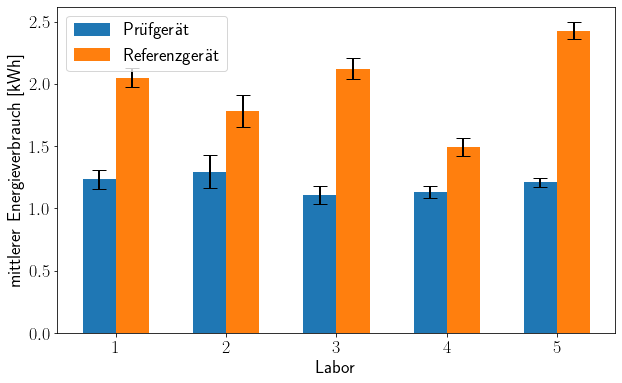

In [6]:
plt.bar(wama_labors_mean.index, wama_labors_mean['Prüfgerät'], label='Prüfgerät', width=-0.3, align='edge',
       yerr=wama_labors_mean['sL Prüfgerät'], capsize=7)
plt.bar(wama_labors_mean.index, wama_labors_mean['Referenzgerät'], label='Referenzgerät', width=0.3, align='edge',
       yerr=wama_labors_mean['sL Referenzgerät'], capsize=7)
plt.ylabel('mittlerer Energieverbrauch [kWh]')
plt.xlabel('Labor')
plt.legend()

Weitere Fragestellung: Produktionsvariabilität der einzelnen Haushaltsgeräte desselben Typs und Modells, hergestellt auf derselben Fertigungslinie

# Materialeffizienz

Normen EN 4555X, d.h. EN 45552 - EN 45559, wobei die direkte Anwendbarkeit von EN 45557 - EN 45559 fraglich ist

TR 45550 Definitionen gelten

Reparierbarkeit, Wiedernutzungsfähigkeit und Upgradeability ähnlich zu bewerten

Wie kann man reproduzierbar und verlässlich Materialeffizienz messen? (wenn man selber oder andere es nachmessen, muss dasselbe herauskommen)

Definition der Grenzsituationen - was ist kaputt?

Ist ein Waschtrockner auch kaputt, wenn er nicht mehr wäscht, aber noch trocknet?

EN 45554 enthält Kriterien zur Zerlegbarkeit

Werkzeuge, Kompetenzen für Laien zugänglich, bis hin zu Spezialistenwissen (nur Hersteller)

Es werden Prioritäten für Komponenten definiert, deren Zuverlässigkeit und Reparierbarkeit klar ist.

Am besten sind das anfällige Bauteile.

Daten löschen ist auch ein Thema

Kriterien für gewerbliche Produkte sind eventuell anders als für private Nutzung

Wie viele Bauteile muss ich entnehmen, bis ich bei dem zu reparierenden Bauteil angekommen bin? Wie lange braucht die Zerlegung?

Arbeitsumgebung (Sauberkeit) für Reparatur

Kältemittel (alte Kühlschränke mit FCKW!) z. B. benötigen spezielle Kompetenzen und Umgebung

falls Endnutzer gesetzlich reparieren können müssen, brauchen diese auch bestimmte Informationen

Nutzungszähler (wie stark wurde das Produkt genutzt) sollte nicht resetbar sein, um einen transparenten Secondhand-Index zu haben

Recycling sollte anhand der WEEE definiert werden (Sammelkategorien)

kritische Rohmaterialien adressieren separat (wenn relevante Menge enthalten)

Recyclatanteil (EN 45557) - wie vergleicht man verschiedene Produkte?

wie kann man das überhaupt nachmessen?

Rezyklate aus Fertigungsabfällen? oder aus alten Produkten?

Alterung ist noch nicht so klar definiert - was ist kaputt? 

## Literatur

```{bibliography}
:filter: docname in docnames
```